# Testing Clustering ML models with Data Sets

## Base:

Read the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# dataset = pd.read_csv(<PATH>)
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
# Check data
dataset.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [27]:
# Transoforming all data into numeric
from sklearn.preprocessing import LabelEncoder
n_columns = dataset.shape[1]
columns = dataset.columns[1::]
encoders = [ LabelEncoder() for _ in range(n_columns - 1)]

In [33]:
prepross_data = dataset.copy()

In [34]:
i = 0
for column in columns:
    prepross_data[column] = encoders[i].fit_transform(dataset[column])
    i += 1

In [42]:
prepross_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,1,0,30
1,2,1,3,0,67
2,3,0,2,1,4
3,4,0,5,1,64
4,5,0,13,2,31


In [51]:
X = prepross_data.iloc[:, 1:].values


Time for the model and ...

In [36]:
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import sklearn.model_selection as training
import sklearn.metrics as metrics
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import silhouette_visualizer

C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

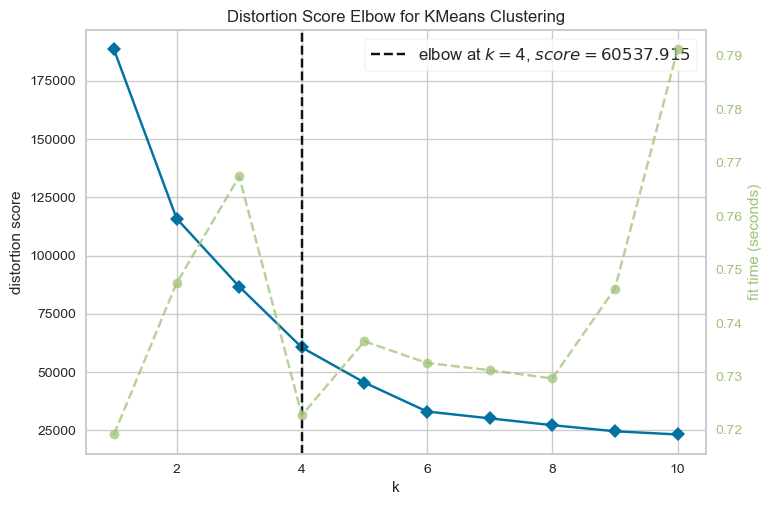

In [53]:
kmeans = cluster.KMeans()
visualizer = KElbowVisualizer(kmeans, k = (1, 11))
visualizer.fit(X)
visualizer.show()
plt.show()

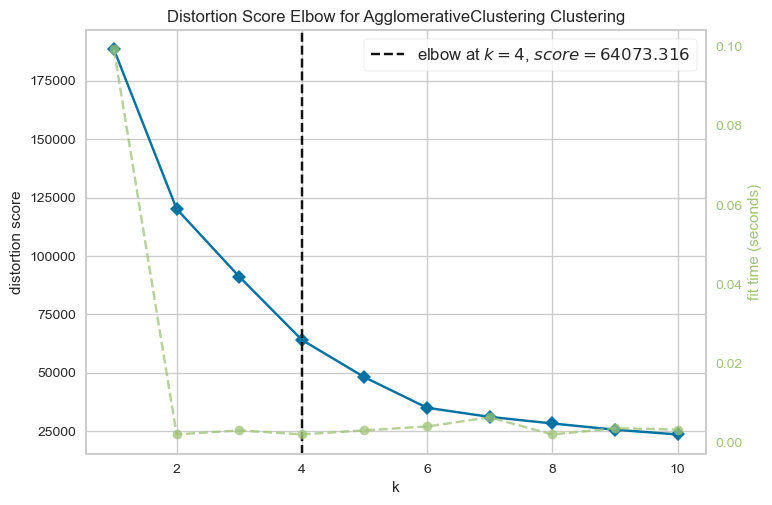

In [54]:
hc  = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(hc, k = (1, 11))
visualizer.fit(X)
visualizer.show()
plt.show()

In [59]:
n_clus = 4

kmeans = cluster.KMeans(n_clusters = n_clus)
y_kmeans = kmeans.fit_predict(X)

C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [63]:
hc = cluster.AgglomerativeClustering(n_clusters = n_clus)
y_hc = hc.fit_predict(X)

In [64]:
prepross_data['Label'] = y_kmeans
prepross_data.head()



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,1,1,0,30,0
1,2,1,3,0,67,0
2,3,0,2,1,4,3
3,4,0,5,1,64,0
4,5,0,13,2,31,0


Metrics

In [65]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [67]:
# Best : near 1;  Worst: near -1;   Overlapping: near 0
silhoutte_kmeans = silhouette_score(X, y_kmeans)

silhoutte_hc = silhouette_score(X, y_hc)

print('silhoutte kmeans :', silhoutte_kmeans)
print('silhoutte hc', silhoutte_hc)

silhoutte kmeans : 0.41836163102646284
silhoutte hc 0.40113113035937104


In [ ]:

calinski_harabasz_kmeans = silhouette_score(X, y_kmeans)

calinski_harabasz_hc = silhouette_score(X, y_hc)

print('calinski harabasz kmeans:', calinski_harabasz_kmeans)
print('calinski harabasz hc', calinski_harabasz_hc)